In [107]:
import numpy as np
import matplotlib.pyplot as plt

In [108]:
X_train = np.linspace(-1, 1, 20)
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [109]:
X_test = np.linspace(-1, 1, 20)
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

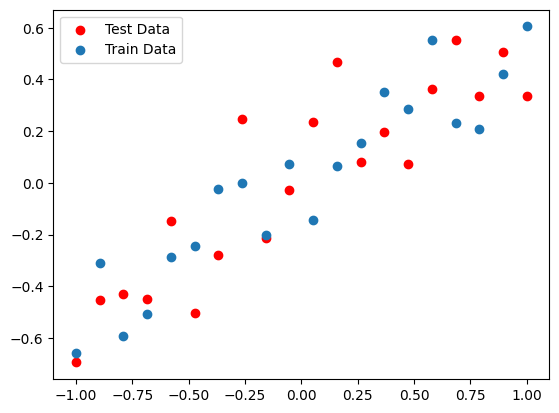

In [110]:
plt.scatter(X_test, y_test, color='r', label='Test Data')
plt.scatter(X_train, y_train, label='Train Data')
plt.legend()
plt.show()

In [111]:
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [112]:
model_1 = Sequential([
    Input(shape=(1,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

In [113]:
model_1.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
history_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

In [114]:
train_mse = model_1.evaluate(X_train, y_train, verbose=0)
test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.013039271347224712, Test: 0.03483956307172775


In [115]:
y_pred_1 = model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


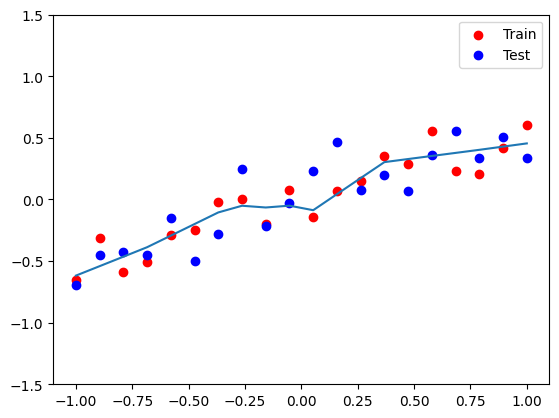

In [116]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

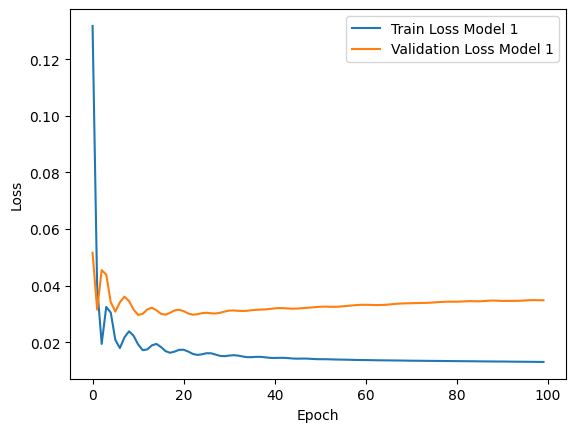

In [117]:
plt.plot(history_1.history['loss'], label='Train Loss Model 1')
plt.plot(history_1.history['val_loss'], label='Validation Loss Model 1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [118]:
model_2 = Sequential([
    Input(shape=(1,)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1)
])

In [119]:
model_2.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
history_2 = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

In [120]:
train_mse_2 = model_2.evaluate(X_train, y_train, verbose=0)
test_mse_2 = model_2.evaluate(X_test, y_test, verbose=0)
print('Train Model 2: {}, Test Model 2: {}'.format(train_mse_2, test_mse_2))

Train Model 2: 0.01553239207714796, Test Model 2: 0.029825013130903244


In [121]:
y_pred_2 = model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


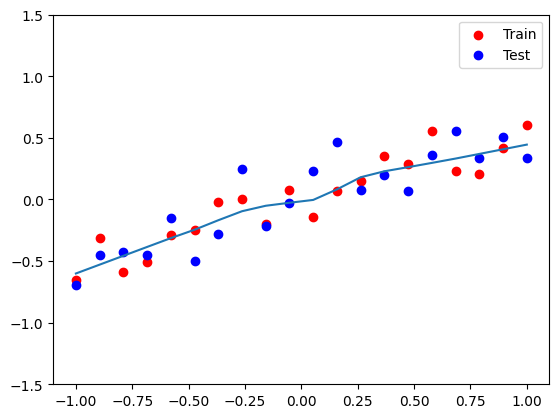

In [122]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

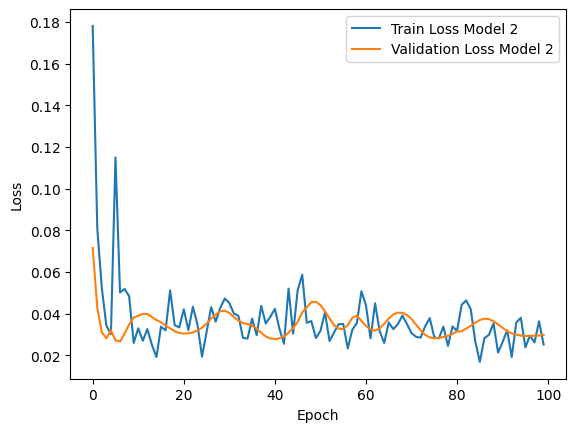

In [123]:
plt.plot(history_2.history['loss'], label='Train Loss Model 2')
plt.plot(history_2.history['val_loss'], label='Validation Loss Model 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

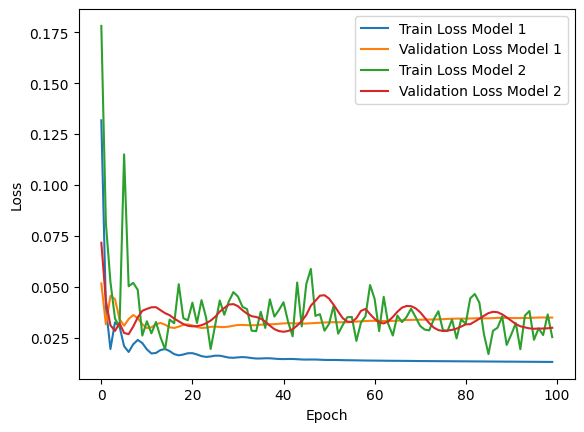

In [124]:
plt.plot(history_1.history['loss'], label='Train Loss Model 1')
plt.plot(history_1.history['val_loss'], label='Validation Loss Model 1')
plt.plot(history_2.history['loss'], label='Train Loss Model 2')
plt.plot(history_2.history['val_loss'], label='Validation Loss Model 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()